# TAREA 1: Regresiones
#### Inteligencia Artificial
#### Autor: Miguel Alejandro López Olvera
#### Correo: alejandrolo829@gmail.com

Step 1: Importing libraries and dataset

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sympy import symbols
from sklearn import linear_model

df = pd.read_csv("https://raw.githubusercontent.com/ulises1229/IA-2021-II/main/data/iris.csv")
    
#df.head()

*The formula for our lineal model is:*

$ \hat{y} =  b_0 + b_1 x$

Where the slope can be understood as follows:

$b1 = \frac{\sum x y  - \frac{(\sum x )(\sum y)}{n} }{\sum x^2 - \frac{(\sum x)^2}{n}} = \frac{S_{xy}}{S_{xx}}$

Step 2:
Definition of a class to graph all the functions we want


In [ ]:
class Graph:

    def plotGraph(self, title, xlabel,ylabel):
        plt.title(title)
        plt.ylabel(ylabel)
        plt.xlabel(xlabel)
    def plotScatter(self, x, y, label):
        plt.scatter(x,y,label = label)
    def plotFunction(self, rangex,func, color, legend):
        plt.plot(rangex,func, color = color, label = legend)
    def showPlot(self):
        plt.show()


Step 3: we define a class that contains the following methods:

       1. Constructor: that contains our variables.
    
       2.Linear regression: main function to make our linear model
    
       3. predict: receives a value on the "x" axis and returns a y value that fits the linear model
    
       4. MSE: here we calculate the mean square error

In [ ]:
class Regression:
    def __init__(self, x, y,x_t,y_t):
        self.x = x
        self.y = y
        self.x_t = x_t
        self.y_t = y_t
        self.a = symbols('a')

    """ In this method we are doing a linear regression model"""
    def linearRegression(self):
        """We have to calculate the slope of the regression line"""
        #the first step is to calculate the sum of the square of the differences between x_mean and x  -->SSxx 
        x_mean = self.x.mean()
        diffx = x_mean-self.x
        diffx_squared = diffx**2
        SSxx = diffx_squared.sum()
        #The second step is to calculate SSxy
        y_mean = self.y.mean()
        diffy = y_mean-self.y 
        SSxy = (diffx * diffy).sum()
        #once we have SSxx and SSxy we can calculate the slope just diving one by another following our equation
        b1 = SSxy/SSxx
        #finally, solving for the intercept we obtain:
        b0 = y_mean -b1*x_mean
        equation = b1*self.a+b0
        return (equation, b0, b1)
    """Here we use our linear regression model to predict data """
    def predict(self, value):
        objG = Graph()
        equation, b0, b1 = self.linearRegression()
        y = equation.subs(self.a,value)
        y_predict_1 = b1*self.x+b0 #predicted values  
        y_predict_2 = b1*self.x_t+b0 #predicted values with data for testing 
        #Plotting our model
        objG.plotScatter(self.x,self.y,'Training values')
        mse_1 = self.MSE(self.y, y_predict_1) #minimum squared error
        mse_2 = self.MSE(self.y_t, y_predict_2) #minimum squared error with data for testing
        plt.plot(value, y, color= "green", marker ="*", markersize =10,label ='Predicted value')
        print(" Prediction ")
        print("X: ", value)
        print("Y: ", y)
        print("Mean Squared Error with data for training", mse_1)
        print("Mean Squared Error with data for testing", mse_2)
        return y,b0,b1
    """This method is used to calculate the Mean Square Error"""
    def MSE(self, y, y_predict):
        mse = np.mean((y-y_predict)**2)
        return (mse)
     

Step 4: Our main function in which we call the classes and methods that we previously defined

 Prediction 
X:  4
Y:  5.43412707909537
Mean Squared Error with data for training 0.054738918613993486
Mean Squared Error with data for testing 0.055466874516721915
Total number of data:  50
For training:  35
For testing:  15


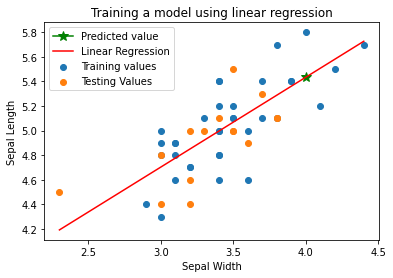

In [ ]:
def main():
    
    #Data definition, 30%=testing, 70%=training
    wSep = df.Sepal_Width[df.Species == 'setosa']
    lSep = df.Sepal_Length[df.Species == 'setosa']
    N_train = (int)((len(wSep))*0.7)#Number of data to train the model
    x_train = wSep[:N_train]
    x_test = wSep[N_train:]
    y_train = lSep[:N_train]
    y_test = lSep[N_train:]
    # Plot data
    objG = Graph()
    objR = Regression(x_train,y_train,x_test, y_test)
    y,b0,b1 = objR.predict(4)
    #Data for plot the linear regression
    objG.plotGraph('Training a model using linear regression', 'Sepal Width','Sepal Length')
    objG.plotScatter(x_test,y_test, 'Testing Values')
    r = np.linspace(np.min(wSep),np.max(wSep),len(wSep))
    objG.plotFunction(r,b1*r+b0, 'red', 'Linear Regression')
    plt.legend()
    #printing the results
    print("Total number of data: ", len(wSep))
    print("For training: ", len(x_train))
    print("For testing: ", len(x_test))
if __name__ == "__main__":
    main()
